In [1]:
import os
import sys
import pandas as pd

# setting warnings
import warnings
warnings.simplefilter(action='ignore', category = Warning)

# add parent folder path to the namespace
sys.path.append(os.path.dirname(os.getcwd()))

# import modules and components
from utils.data_assets import PreProcessing, DataValidation 
import utils.global_paths as globpt
import configurations as cnf

# specify relative paths from global paths and create subfolders
images_path = os.path.join(globpt.data_path, 'images') 
val_path = os.path.join(globpt.data_path, 'validation')
os.mkdir(images_path) if not os.path.exists(images_path) else None
os.mkdir(val_path) if not os.path.exists(val_path) else None  

# Load and prepare data

In [2]:
preprocessor = PreProcessing()
validator = DataValidation()

# find and assign images path
images_paths = []
for root, dirs, files in os.walk(images_path):
    for file in files:
        images_paths.append(os.path.join(root, file))

# select a fraction of data for training
total_samples = cnf.num_train_samples + cnf.num_test_samples
df_images = pd.DataFrame(images_paths, columns=['images path'])
df_images = df_images.sample(total_samples, random_state=cnf.seed)

# create train and test datasets (for validation)
test_data = df_images.sample(n=cnf.num_test_samples, random_state=cnf.split_seed)
train_data = df_images.drop(test_data.index)


# 1. Data evaluation

## 1.1 Evaluation report

In [3]:
print(f'Number of train samples: {train_data.shape[0]}')
print(f'Number of test samples:  {test_data.shape[0]}')

Number of train samples: 7000
Number of test samples:  1000


## 1.1 Pixel intensity 

100%|██████████| 1000/1000 [00:03<00:00, 259.51it/s]


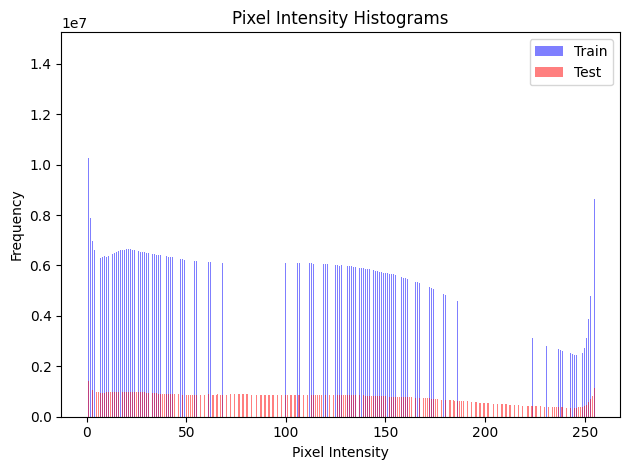

In [4]:
# load train and test images as numpy arrays
train_images = preprocessor.load_images(train_data['images path'], cnf.picture_shape[:-1], 
                                        as_tensor=False,  normalize=False)
test_images = preprocessor.load_images(test_data['images path'], cnf.picture_shape[:-1], 
                                       as_tensor=False, normalize=False)

# validate pixel intensity histograms for both datasets
validator.pixel_intensity_histograms(train_images, test_images, val_path,
                                     names=['Train', 'Test'])
